In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os 
from os.path import join as pjoin
import glob
import numpy as np
from scipy import linalg as LA
import cv2
import time
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18,18)
mpl.rcParams['image.cmap'] = 'inferno'

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
dataset_path = 'data/highway'
color = False
imgshape = np.array([120, 160]) # spatial size of the frame
m_start = 40 # frames starting from
m = 10  # number of frames
m_freq = 5 # frequency
ext = 'jpg'

X = get_data_matrix(dataset_path, imgshape, m, m_start, m_freq, color, ext)

# Single pass

In [45]:
SVD, RPCA, ROSL = {}, {}, {}

## SVD

In [46]:
### PARAMS
k = 1
##########

SVD['A'], SVD['E'] = bmSVD(X, k)

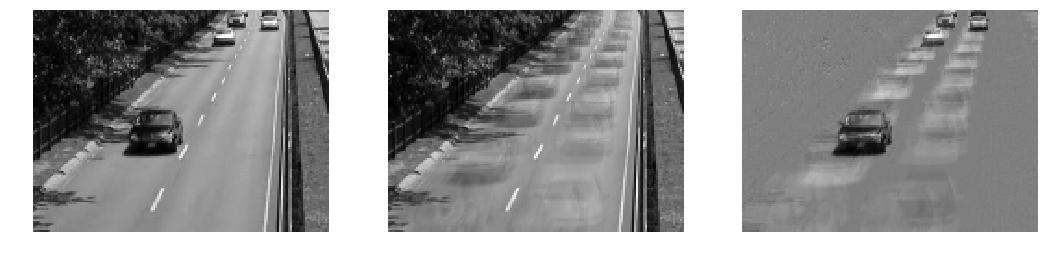

In [47]:
stack_images((X, SVD['A'], SVD['E']), k=1, imgshape=imgshape)

## RPCA

In [48]:
### PARAMS
mu = 0.0001
lmbda = 0.01
##########
    
RPCA['A'], RPCA['E'] = bmRPCA(X, mu, lmbda)

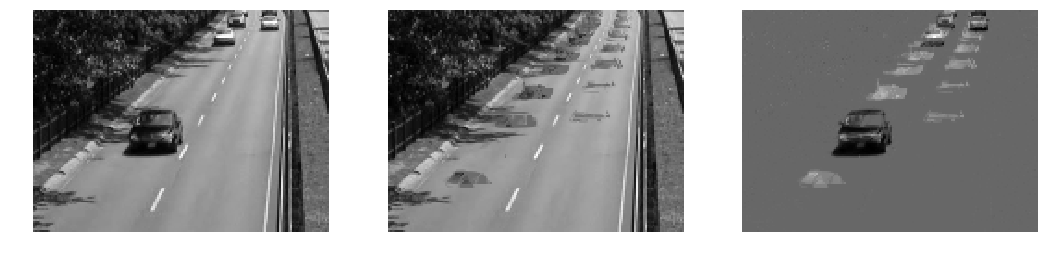

In [49]:
stack_images((X, RPCA['A'], RPCA['E']), k=1, imgshape=imgshape)

## ROSL

In [50]:
### PARAMS
k = 1
reg = 1
tol = 1e-06
iters = 500
##########

ROSL['A'], ROSL['E'] = bmROSL(X, k, reg, tol, iters)

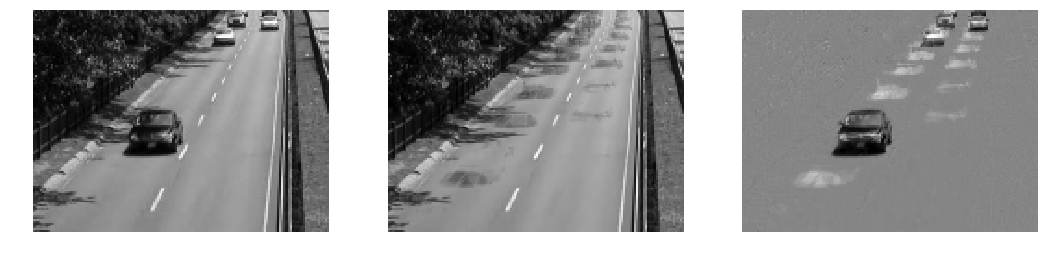

In [51]:
stack_images((X, ROSL['A'], ROSL['E']), k=1, imgshape=imgshape)

# Visual comparison

In [52]:
imgshape = np.array([240, 320]) # spatial size of the frame
m_start = 40 # frames starting from
m = 10  # number of frames
m_freq = 5 # frequency
ext = 'jpg'

## Fix `m`, change `m_freq`

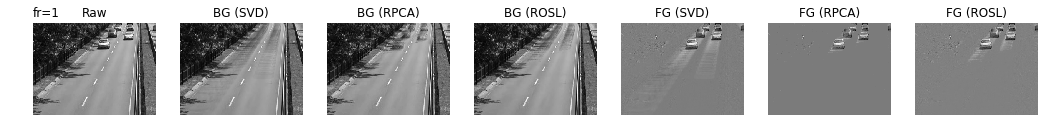

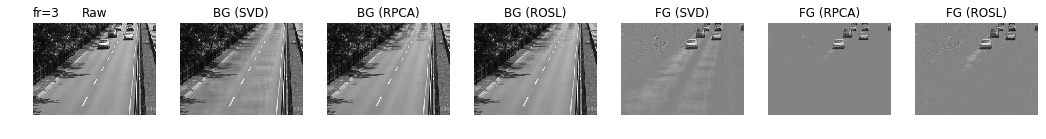

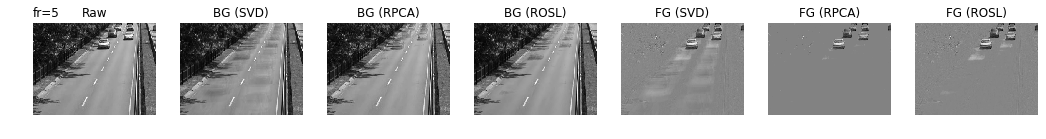

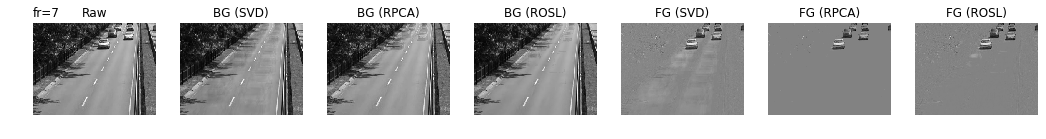

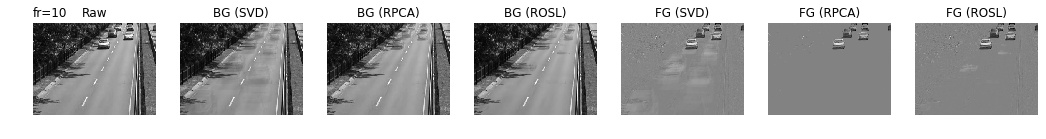

In [53]:
m_start = 50
m = 20
for m_freq in [1, 3, 5, 7, 10]:
    bmCompare(dataset_path, imgshape, m, m_start, m_freq, color, ext, 'fr={}'.format(m_freq))

## Fix `m_freq`, change `m`

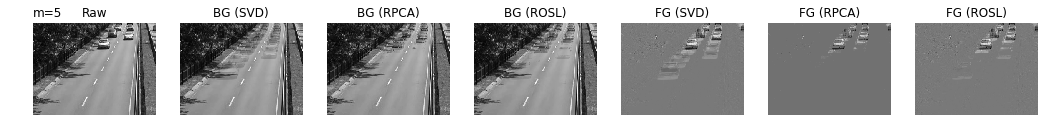

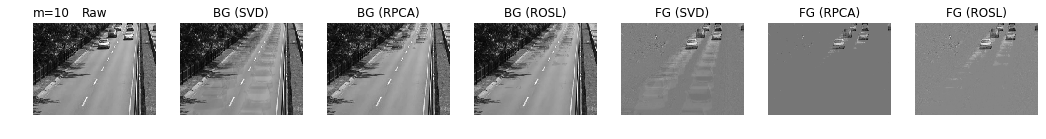

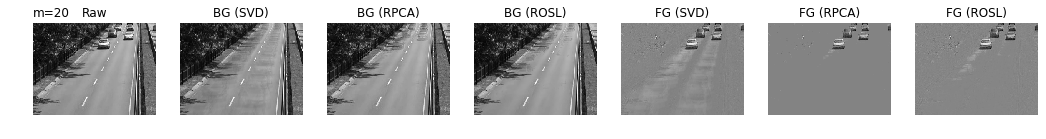

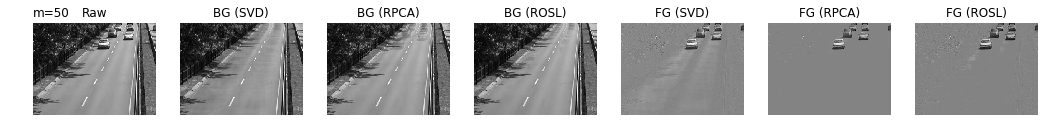

In [54]:
m_freq = 3
for m in [5, 10, 20, 50]:
    bmCompare(dataset_path, imgshape, m, m_start, m_freq, color, ext, 'm={}'.format(m))

# Time comparison

In [55]:
m_freq = 3

## Fix `imgshape`, change `m`

In [56]:
imgshape = np.array([240, 320])
timeSVD, timeRPCA, timeROSL = [], [], []
ms = [5, 10, 20, 50]
for m in ms:
    tSVD, tRPCA, tROSL = bmCompareTime(dataset_path, imgshape, m, m_start, m_freq, color, ext, n_it=1)
    timeSVD.append(tSVD)
    timeRPCA.append(tRPCA)
    timeROSL.append(tROSL)

In [58]:
print('\tSVD\tRPCA\tROSL')
for i in range(len(imgshape)):
    print('m = {:2}\t{:.5f} {:.5f} {:.5f}'.format(ms[i], timeSVD[i], timeRPCA[i], timeROSL[i]))

	SVD	RPCA	ROSL
m =  5	0.01337 0.98007 0.19500
m = 10	0.01998 2.12327 0.34797


## Fix `m`, change `imgshape`

In [60]:
m = 10
imgshapes = [np.array([240, 320])//i for i in [8, 4, 2, 1]]
timeSVD, timeRPCA, timeROSL = [], [], []
for imgshape in imgshapes:
    tSVD, tRPCA, tROSL = bmCompareTime(dataset_path, imgshape, m, m_start, m_freq, color, ext, n_it=1)
    timeSVD.append(tSVD)
    timeRPCA.append(tRPCA)
    timeROSL.append(tROSL)

In [68]:
print('     Image size\t\t  Performance time(s)\t')
print('\t\t\tSVD\tRPCA\tROSL')
for i in range(len(imgshapes)):
    print('(h, w) = ({:3}, {:3})\t{:.5f} {:.5f} {:.5f}'.format(*imgshapes[i], timeSVD[i], timeRPCA[i], timeROSL[i]))

     Image size		  Performance time(s)	
			SVD	RPCA	ROSL
(h, w) = ( 30,  40)	0.00049 0.64127 0.01037
(h, w) = ( 60,  80)	0.00121 2.40728 0.02605
(h, w) = (120, 160)	0.00420 2.22439 0.09041
(h, w) = (240, 320)	0.01891 2.17815 0.36524
